In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
df = pd.read_csv('/content/drive/MyDrive/it19_data/MilkQuality.csv')
milk = df.copy()
milk

,pH,Temperature,Taste,Odor,Fat,Turbidity,Color,Grade
0,6.6,35.0,1,0.0,1,0.0,254,high
1,6.6,36.0,0,1.0,0,1.0,253,high
2,8.5,70.0,1,1.0,1,1.0,246,low
3,9.5,34.0,1,1.0,0,1.0,255,low
4,6.6,37.0,0,0.0,0,0.0,255,medium
...,...,...,...,...,...,...,...,...
1054,6.7,45.0,1,1.0,0,0.0,247,medium
1055,6.7,38.0,1,0.0,1,0.0,255,high
1056,3.0,40.0,1,1.0,1,1.0,255,low
1057,6.8,43.0,1,0.0,1,0.0,250,high


In [38]:
milk.isna().sum()

pH             1
Temperature    3
Taste          0
Odor           2
Fat            0
Turbidity      4
Color          0
Grade          0
dtype: int64

In [39]:
milk = milk.dropna() 

In [40]:
milk.isna().sum()

pH             0
Temperature    0
Taste          0
Odor           0
Fat            0
Turbidity      0
Color          0
Grade          0
dtype: int64

In [41]:
for i in milk.columns:
  print(milk[i].unique().shape)
  print(np.sort(milk[i].unique()))
  print()

(16,)
[3.  4.5 4.7 5.5 5.6 6.4 6.5 6.6 6.7 6.8 7.4 8.1 8.5 8.6 9.  9.5]

(17,)
[34. 35. 36. 37. 38. 40. 41. 42. 43. 45. 50. 55. 60. 65. 66. 70. 90.]

(2,)
[0 1]

(2,)
[0. 1.]

(2,)
[0 1]

(2,)
[0. 1.]

(9,)
[240 245 246 247 248 250 253 254 255]

(3,)
['high' 'low' 'medium']



<Axes: >

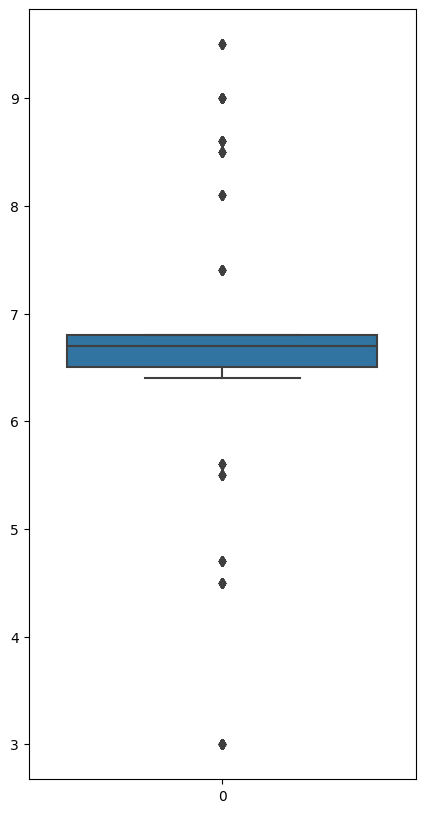

In [42]:
plt.figure(figsize=(5,10))  
sns.boxplot(data=milk['pH'])

<Axes: >

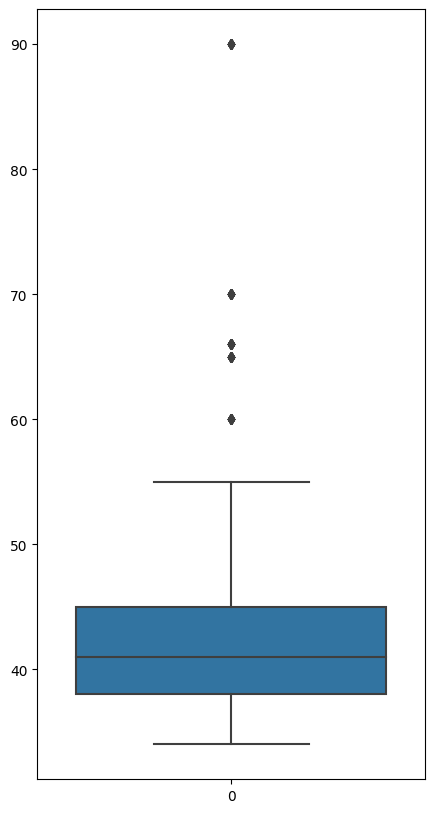

In [43]:
plt.figure(figsize=(5,10))  
sns.boxplot(data=milk['Temperature'])

<Axes: >

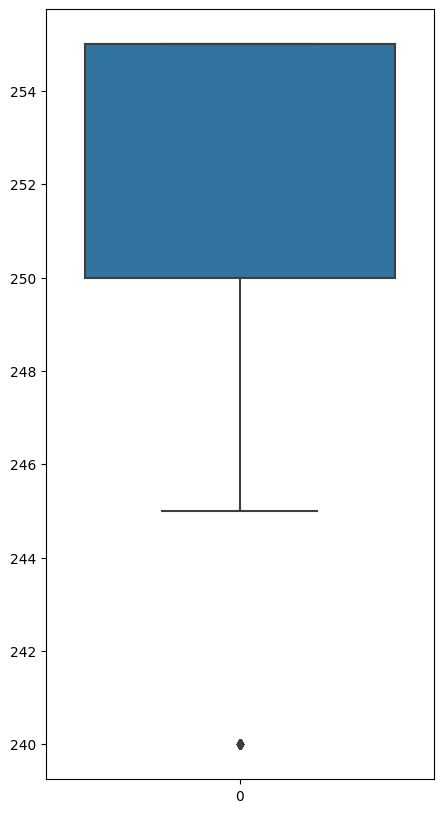

In [44]:
plt.figure(figsize=(5,10))  
sns.boxplot(data=milk['Color'])

In [45]:
milk = milk[np.abs(milk['pH'] - milk['pH'].mean()) <= (3*milk['pH'].std())]
milk = milk[np.abs(milk['Temperature'] - milk['Temperature'].mean()) <= (3*milk['Temperature'].std())]
milk = milk[np.abs(milk['Color'] - milk['Color'].mean()) <= (3*milk['Color'].std())]
milk

,pH,Temperature,Taste,Odor,Fat,Turbidity,Color,Grade
0,6.6,35.0,1,0.0,1,0.0,254,high
1,6.6,36.0,0,1.0,0,1.0,253,high
2,8.5,70.0,1,1.0,1,1.0,246,low
3,9.5,34.0,1,1.0,0,1.0,255,low
4,6.6,37.0,0,0.0,0,0.0,255,medium
...,...,...,...,...,...,...,...,...
1054,6.7,45.0,1,1.0,0,0.0,247,medium
1055,6.7,38.0,1,0.0,1,0.0,255,high
1056,3.0,40.0,1,1.0,1,1.0,255,low
1057,6.8,43.0,1,0.0,1,0.0,250,high


In [99]:
# Scaling
from sklearn.preprocessing import MinMaxScaler, RobustScaler

# Train Test Split
from sklearn.model_selection import train_test_split

# Metrics
from sklearn.metrics import accuracy_score, confusion_matrix

In [47]:
milk[['pH', 'Temperature', 'Color']] = RobustScaler().fit_transform(milk[['pH', 'Temperature', 'Color']])
milk

,pH,Temperature,Taste,Odor,Fat,Turbidity,Color,Grade
0,-0.333333,-0.714286,1,0.0,1,0.0,-0.2,high
1,-0.333333,-0.571429,0,1.0,0,1.0,-0.4,high
2,6.000000,4.285714,1,1.0,1,1.0,-1.8,low
3,9.333333,-0.857143,1,1.0,0,1.0,0.0,low
4,-0.333333,-0.428571,0,0.0,0,0.0,0.0,medium
...,...,...,...,...,...,...,...,...
1054,0.000000,0.714286,1,1.0,0,0.0,-1.6,medium
1055,0.000000,-0.285714,1,0.0,1,0.0,0.0,high
1056,-12.333333,0.000000,1,1.0,1,1.0,0.0,low
1057,0.333333,0.428571,1,0.0,1,0.0,-1.0,high


In [48]:
grade, milk['Grade'] = np.unique(milk['Grade'], return_inverse=True)

In [49]:
grade

array(['high', 'low', 'medium'], dtype=object)

In [52]:
milk = milk.reset_index(drop=1)
milk

,pH,Temperature,Taste,Odor,Fat,Turbidity,Color,Grade
0,-0.333333,-0.714286,1,0.0,1,0.0,-0.2,0
1,-0.333333,-0.571429,0,1.0,0,1.0,-0.4,0
2,6.000000,4.285714,1,1.0,1,1.0,-1.8,1
3,9.333333,-0.857143,1,1.0,0,1.0,0.0,1
4,-0.333333,-0.428571,0,0.0,0,0.0,0.0,2
...,...,...,...,...,...,...,...,...
1027,0.000000,0.714286,1,1.0,0,0.0,-1.6,2
1028,0.000000,-0.285714,1,0.0,1,0.0,0.0,0
1029,-12.333333,0.000000,1,1.0,1,1.0,0.0,1
1030,0.333333,0.428571,1,0.0,1,0.0,-1.0,0


In [56]:
train, test, train_Y, test_Y = train_test_split(milk.iloc[:,:-1], milk['Grade'], 
                                                test_size=0.2, random_state=28)

In [57]:
train

,pH,Temperature,Taste,Odor,Fat,Turbidity,Color
881,-0.666667,-0.428571,0,0.0,0,0.0,0.0
655,-12.333333,0.000000,1,1.0,1,1.0,0.0
47,-0.666667,-0.428571,0,0.0,0,0.0,0.0
805,-0.666667,-0.571429,0,0.0,1,0.0,0.0
52,0.000000,0.714286,1,1.0,0,0.0,-1.6
...,...,...,...,...,...,...,...
152,0.000000,0.714286,1,1.0,1,0.0,-2.0
453,-0.333333,0.428571,1,0.0,1,1.0,-1.0
192,-12.333333,0.000000,1,1.0,1,1.0,0.0
140,-0.666667,-0.571429,0,0.0,0,0.0,-1.6


In [58]:
train_Y,

(881    2
 655    1
 47     2
 805    2
 52     2
       ..
 152    2
 453    0
 192    1
 140    2
 87     1
 Name: Grade, Length: 825, dtype: int64,)

In [60]:
test

,pH,Temperature,Taste,Odor,Fat,Turbidity,Color
862,0.333333,0.714286,1,1.0,1,1.0,-2.0
246,0.333333,0.714286,1,1.0,1,1.0,-2.0
155,0.333333,1.428571,0,0.0,1,0.0,0.0
273,0.000000,0.714286,1,1.0,0,0.0,-1.6
270,-4.000000,0.714286,1,0.0,1,1.0,-1.0
...,...,...,...,...,...,...,...
114,7.666667,0.428571,1,0.0,1,1.0,-1.0
624,0.333333,-0.857143,0,0.0,0,1.0,-3.0
988,-6.666667,-0.285714,1,0.0,1,0.0,0.0
23,-0.666667,-0.571429,0,1.0,1,0.0,-0.4


In [61]:
test_Y

862    0
246    0
155    1
273    2
270    1
      ..
114    1
624    2
988    1
23     0
231    2
Name: Grade, Length: 207, dtype: int64

#Supervised Learning

## DecisionTree

In [93]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree

dtc = tree.DecisionTreeClassifier()
model_1 = dtc.fit(train, train_Y)

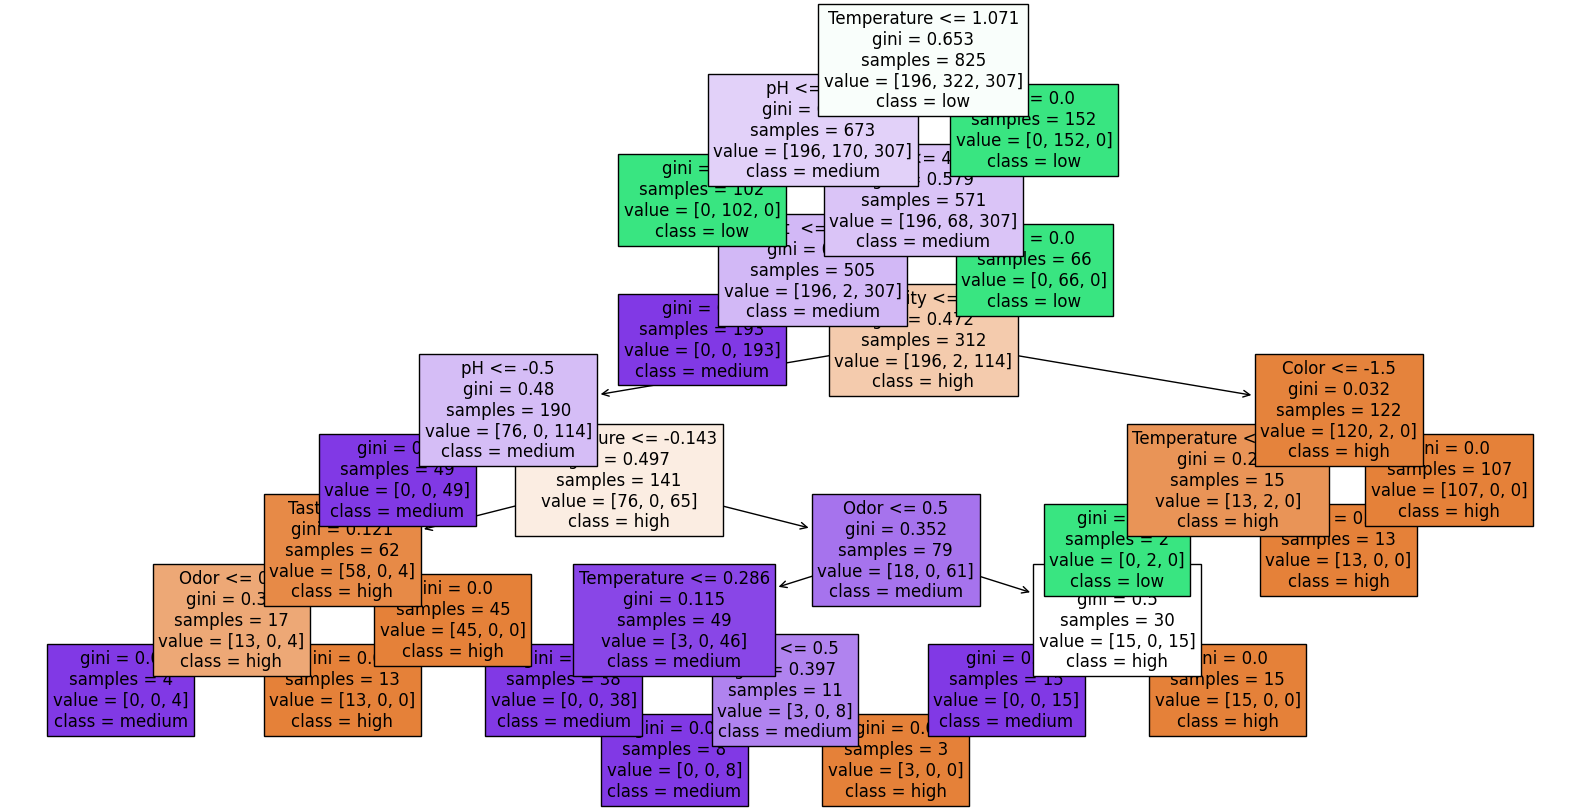

In [94]:
plt.figure(figsize=(20,10))
plot_tree(model_1, filled=True, feature_names=train.columns, class_names=grade, fontsize=12)
plt.show()

In [95]:
print("Training Accuracy :", accuracy_score(train_Y, model_1.predict(train)))
print("Testing Accuracy :", accuracy_score(test_Y, model_1.predict(test)))

Training Accuracy : 1.0
Testing Accuracy : 0.9806763285024155


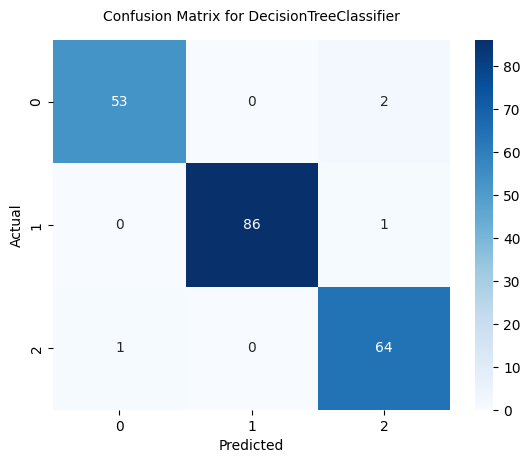

In [96]:
y_pred_dtc = model_1.predict(test)
cf_matrix = confusion_matrix(test_Y, y_pred_dtc)
sns.heatmap(cf_matrix, annot=True, cmap='Blues')

plt.title("Confusion Matrix for DecisionTreeClassifier", fontsize=10, y=1.03)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Gaussian Naive Bias

In [75]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
model_2 = nb.fit(train, train_Y)

In [76]:
print("Training Accuracy :", nb.score(train, train_Y))
print("Testing Accuracy :", nb.score(test,test_Y))

Training Accuracy : 0.8290909090909091
Testing Accuracy : 0.8164251207729468


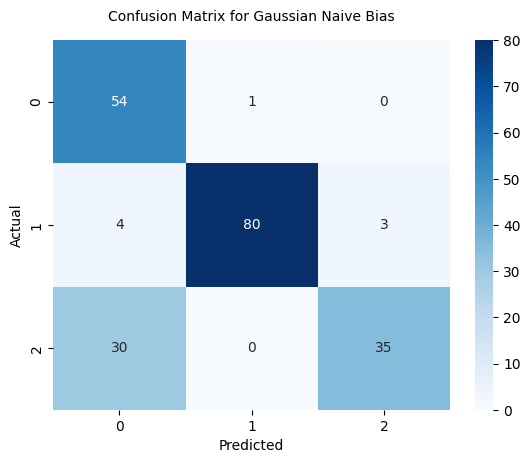

In [78]:
y_pred_nb = nb.predict(test)
cf_matrix = confusion_matrix(test_Y, y_pred_nb)
sns.heatmap(cf_matrix, annot=True, cmap='Blues')

plt.title("Confusion Matrix for Gaussian Naive Bias", fontsize=10, y=1.03)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Random Forest

In [82]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
model_3 = rfc.fit(train, train_Y)

In [83]:
print("Training Accuracy :", accuracy_score(train_Y, model_3.predict(train)))
print("Testing Accuracy :", accuracy_score(test_Y, model_3.predict(test)))

Training Accuracy : 1.0
Testing Accuracy : 0.9903381642512077


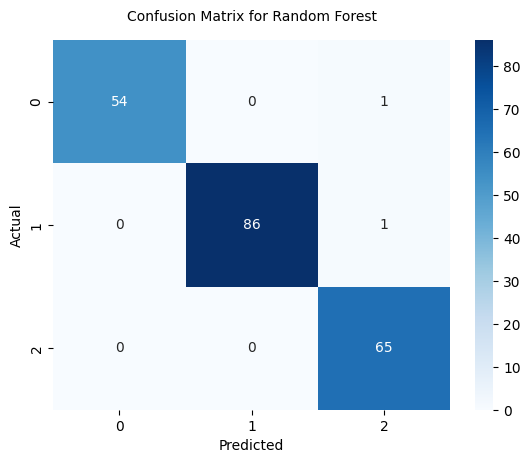

In [84]:
y_pred_rfc = model_3.predict(test)
cf_matrix = confusion_matrix(test_Y, y_pred_rfc)
sns.heatmap(cf_matrix, annot=True, cmap='Blues')

plt.title("Confusion Matrix for Random Forest", fontsize=10, y=1.03)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Unsupervised Learning(Kmeans)

In [103]:
X = MinMaxScaler().fit_transform(milk.iloc[:,:-1])
X

array([[0.55384615, 0.02777778, 1.        , ..., 1.        , 0.        ,
        0.93333333],
       [0.55384615, 0.05555556, 0.        , ..., 0.        , 1.        ,
        0.86666667],
       [0.84615385, 1.        , 1.        , ..., 1.        , 1.        ,
        0.4       ],
       ...,
       [0.        , 0.16666667, 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.58461538, 0.25      , 1.        , ..., 1.        , 0.        ,
        0.66666667],
       [0.86153846, 0.58333333, 0.        , ..., 1.        , 1.        ,
        1.        ]])

In [97]:
from sklearn.cluster import KMeans

In [105]:
K = range(2,12)
E_2 =[]
for k in K:
    model_4= KMeans(n_clusters=k)
    model_4 = model_4.fit(X)
    E_2.append(model_4.inertia_)
E_2

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[816.2370745821455,
 628.7272532777381,
 521.9286479504042,
 440.84842345746733,
 373.1166032518233,
 318.3925938416076,
 267.7019197096007,
 222.28622774707213,
 196.0303305815578,
 167.32018337626891]

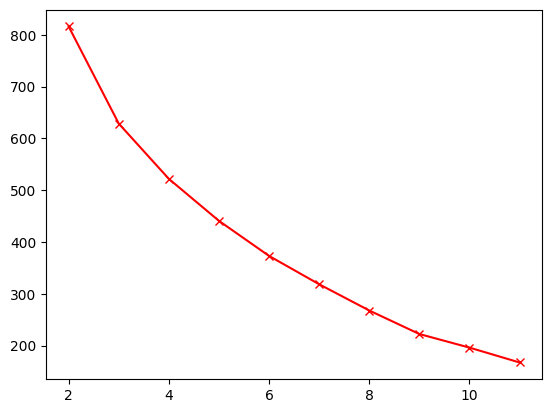

In [106]:
plt.plot(K,E_2,'rx-')

In [111]:
model_4 = KMeans(n_clusters=3)
model_4.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [112]:
model_4.fit_transform(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([[1.48066288, 1.32739021, 0.4965431 ],
       [1.0764859 , 1.26543867, 1.69566766],
       [1.07134607, 1.94721366, 1.42341296],
       ...,
       [0.74248181, 1.87630831, 1.29308142],
       [1.47920275, 1.29347619, 0.39261192],
       [0.70644404, 1.51856992, 1.6010226 ]])

In [113]:
model_4.n_iter_

3

In [114]:
Y_pred_km = model_4.fit_predict(X)
Y_pred_km

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 2, 2, ..., 2, 1, 2], dtype=int32)

In [115]:
print("Testing Accuracy :", accuracy_score(milk['Grade'], Y_pred_km))

Testing Accuracy : 0.11531007751937984


In [118]:
milk['clusters'] = Y_pred_km
milk

,pH,Temperature,Taste,Odor,Fat,Turbidity,Color,Grade,clusters
0,-0.333333,-0.714286,1,0.0,1,0.0,-0.2,0,1
1,-0.333333,-0.571429,0,1.0,0,1.0,-0.4,0,2
2,6.000000,4.285714,1,1.0,1,1.0,-1.8,1,2
3,9.333333,-0.857143,1,1.0,0,1.0,0.0,1,2
4,-0.333333,-0.428571,0,0.0,0,0.0,0.0,2,0
...,...,...,...,...,...,...,...,...,...
1027,0.000000,0.714286,1,1.0,0,0.0,-1.6,2,0
1028,0.000000,-0.285714,1,0.0,1,0.0,0.0,0,1
1029,-12.333333,0.000000,1,1.0,1,1.0,0.0,1,2
1030,0.333333,0.428571,1,0.0,1,0.0,-1.0,0,1


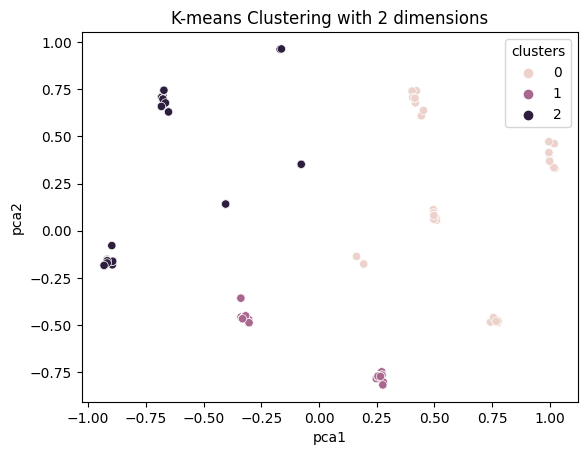

In [120]:
from sklearn.decomposition import PCA

reduced_data = PCA(n_components=2).fit_transform(X)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=milk['clusters'], data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()